# Prediction For Renewable Energy Adoption

Using logistic regression, the goal of this project is to predict whether a country will increase its renewable energy adoption in a given year based on various factors. In a nutshell, we input the features for a country and predict the likelihood of increased renewable energy adoption.


# Feature Seletion

In [128]:
# Entity: The specific country of the data record.
# Year: The specific year of the data record.
# Access to electricity (% of population)
# Access to clean fuels for cooking
# Renewable-electricity-generating-capacity-per-capita
# Financial flows to developing countries (US $)
# Electricity from fossil fuels (TWh)
# Electricity from nuclear (TWh)
# Electricity from renewables (TWh)
# Low-carbon electricity (% electricity)
# Primary energy consumption per capita (kWh/person)
# Energy intensity level of primary energy (MJ/$2017 PPP GDP)
# Value_co2_emissions_kt_by_country
# Renewables (% equivalent primary energy)
# gdp_growth
# gdp_per_capita
# Density (P/Km2)
# Land Area(Km2)
# Latitude
# Longitude

# Label:

"Increase in Renewable Energy Adoption" (Yes/No)" which is derived from the " Renewable energy share in the total final energy consumption (%)" column. If the percentage increases from the previous year for a country, it's labeled as "Yes", otherwise "No

In [129]:
# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

In [130]:
# creating and empty DataFrame:
df = pd.DataFrame()


In [131]:
# loading a CSV file from local device and store it in a pandas DataFrame:
df = pd.read_csv('global-data-on-sustainable-energy.csv').dropna()

# One-hot encoding the 'Entity' column
#df = pd.get_dummies(df, columns=['Entity'])

In [132]:
df[0::10]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density/n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.966870,97.30,8.79,8.100000e+05,0.43,24.96,0.00,0.07,...,9961.6400,4.07,7.865000e+04,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
56,Algeria,2014,99.087010,99.50,6.78,9.400000e+05,0.07,60.15,0.00,0.25,...,15108.6350,5.00,1.477400e+05,0.117502,3.800000,5493.056695,18,2381741.0,28.033886,1.659626
111,Argentina,2006,97.076060,98.10,232.56,4.400000e+05,9.18,65.58,7.15,38.67,...,21038.7230,3.58,1.549000e+05,13.449462,8.047152,5919.012338,17,2780400.0,-38.416097,-63.616672
121,Argentina,2016,99.849580,99.80,245.23,2.501600e+08,9.38,100.80,7.82,31.02,...,22726.4550,3.41,1.831600e+05,10.167007,-2.080328,12790.242470,17,2780400.0,-38.416097,-63.616672
224,Azerbaijan,2014,100.000000,95.50,117.84,2.000000e+04,2.12,22.03,0.00,1.29,...,16145.4700,4.30,3.224000e+04,2.433617,2.750507,7891.313147,123,86600.0,40.143105,47.576927
280,Bangladesh,2007,46.500000,10.30,1.66,5.050000e+07,47.19,28.45,0.00,0.76,...,1458.1193,2.98,3.799000e+04,1.020737,7.058599,558.051841,"1,265",148460.0,23.684994,90.356331
290,Bangladesh,2017,88.000000,20.60,2.65,2.466200e+08,28.36,67.59,0.00,1.32,...,2494.1150,2.50,7.934000e+04,0.894644,7.284174,1563.767819,"1,265",148460.0,23.684994,90.356331
490,Brazil,2007,98.125380,92.60,427.18,9.100000e+05,47.19,37.64,11.65,387.88,...,14770.3510,3.84,3.525600e+05,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.925280
500,Brazil,2017,99.800000,95.70,617.89,5.216200e+08,45.33,101.90,14.86,464.40,...,16608.6860,4.05,4.564900e+05,43.280678,1.322869,9928.675897,25,8515770.0,-14.235004,-51.925280
721,China,2007,98.702200,49.40,109.00,2.477000e+07,14.88,2718.70,62.13,500.71,...,18955.0080,9.81,6.993180e+06,5.718535,14.230861,2693.970063,153,9596960.0,35.861660,104.195397


In [133]:
# Function to determine if there's an increase in renewable energy share
def determine_increase(group):
    group['Increase'] = group['Renewable energy share in the total final energy consumption (%)'].diff().gt(0)
    return group

In [134]:
# Apply the function to each country's data
df = df.groupby('Entity', group_keys=False).apply(determine_increase)

In [135]:
# Converts the boolean values to 'Yes' or 'No'
df['Increase'] = df['Increase'].map({True: 'Yes', False: 'No'})

In [136]:
# Handles the NaN values for the first year of each country
df['Increase'].fillna('No', inplace=True)

In [137]:
df[0::10]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density/n(P/Km2),Land Area(Km2),Latitude,Longitude,Increase
43,Algeria,2001,98.966870,97.30,8.79,8.100000e+05,0.43,24.96,0.00,0.07,...,4.07,7.865000e+04,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626,No
56,Algeria,2014,99.087010,99.50,6.78,9.400000e+05,0.07,60.15,0.00,0.25,...,5.00,1.477400e+05,0.117502,3.800000,5493.056695,18,2381741.0,28.033886,1.659626,No
111,Argentina,2006,97.076060,98.10,232.56,4.400000e+05,9.18,65.58,7.15,38.67,...,3.58,1.549000e+05,13.449462,8.047152,5919.012338,17,2780400.0,-38.416097,-63.616672,No
121,Argentina,2016,99.849580,99.80,245.23,2.501600e+08,9.38,100.80,7.82,31.02,...,3.41,1.831600e+05,10.167007,-2.080328,12790.242470,17,2780400.0,-38.416097,-63.616672,No
224,Azerbaijan,2014,100.000000,95.50,117.84,2.000000e+04,2.12,22.03,0.00,1.29,...,4.30,3.224000e+04,2.433617,2.750507,7891.313147,123,86600.0,40.143105,47.576927,No
280,Bangladesh,2007,46.500000,10.30,1.66,5.050000e+07,47.19,28.45,0.00,0.76,...,2.98,3.799000e+04,1.020737,7.058599,558.051841,"1,265",148460.0,23.684994,90.356331,No
290,Bangladesh,2017,88.000000,20.60,2.65,2.466200e+08,28.36,67.59,0.00,1.32,...,2.50,7.934000e+04,0.894644,7.284174,1563.767819,"1,265",148460.0,23.684994,90.356331,No
490,Brazil,2007,98.125380,92.60,427.18,9.100000e+05,47.19,37.64,11.65,387.88,...,3.84,3.525600e+05,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.925280,Yes
500,Brazil,2017,99.800000,95.70,617.89,5.216200e+08,45.33,101.90,14.86,464.40,...,4.05,4.564900e+05,43.280678,1.322869,9928.675897,25,8515770.0,-14.235004,-51.925280,No
721,China,2007,98.702200,49.40,109.00,2.477000e+07,14.88,2718.70,62.13,500.71,...,9.81,6.993180e+06,5.718535,14.230861,2693.970063,153,9596960.0,35.861660,104.195397,No


Next

-Logistic Regression
-Decision Tree
-Random Forest


# Logistic Regression and Decision Tree

In [138]:
# The following line will import LogisticRegression and DecisionTreeClassifier Classes

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

In [139]:


# Creating the Feature Matrix for our dataset:
# Replace commas and convert the column to numeric
# df['Density/n(P/Km2)'] = df['Density/n(P/Km2)'].str.replace(',', '').astype(float)
df['Density/n(P/Km2)'] = df['Density/n(P/Km2)'].replace(',', '', regex=True).astype(float)


# Rename the column to remove the newline character
#df.rename(columns={'Density\n(P/Km2)': 'Density(P/Km2)'}, inplace=True)

# Update the feature list dropped 'Entity'
feature_cols = ['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density/n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']
#feature_cols = ['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density', 'Land Area(Km2)']

# X = pd.get_dummies(df[feature_cols], columns=['Entity'])
X = df[feature_cols]

# print the first 5 rows
X.head() 


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density/n(P/Km2),Land Area(Km2),Latitude,Longitude
43,2001,98.96687,97.3,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,9961.640,4.07,78650.00000,0.065218,3.0,1740.606654,18.0,2381741.0,28.033886,1.659626
44,2002,98.95306,97.8,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,10180.350,4.12,82400.00153,0.051677,5.6,1781.828908,18.0,2381741.0,28.033886,1.659626
45,2003,98.93401,98.0,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,10510.461,4.08,88190.00244,0.228104,7.2,2103.381291,18.0,2381741.0,28.033886,1.659626
46,2004,98.91208,98.2,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,10759.022,3.96,89489.99786,0.206787,4.3,2610.185422,18.0,2381741.0,28.033886,1.659626
47,2005,98.88961,98.5,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,11113.723,3.90,94190.00244,0.434119,5.9,3113.094883,18.0,2381741.0,28.033886,1.659626


In [140]:
# checking the size of Feature Matix X:

print(X.shape)

(343, 20)


In [141]:
# Print all column names
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density/n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude', 'Increase'],
      dtype='object')


In [142]:
# select a Series of labels (the last column) from the DataFrame
y = df['Increase']

# checking the label vector by printing every 10 values
y[::10]

43       No
56       No
111      No
121      No
224      No
280      No
290      No
490     Yes
500      No
721      No
731     Yes
745      No
987      No
998     Yes
1535    Yes
1545     No
1582    Yes
2144     No
2154     No
2200     No
2210     No
2515    Yes
2525     No
2599    Yes
2609     No
2620     No
2631    Yes
3076     No
3087     No
3127     No
3137     No
3253    Yes
3264    Yes
3392     No
3561    Yes
Name: Increase, dtype: object

In [144]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 


my_logreg = LogisticRegression()

my_decisiontree = DecisionTreeClassifier()

In [145]:
# We can use the method "fit" of the objects "my_logreg" and "my_decisiontree" along with training dataset and labels to train the model.

#my_logreg.fit(X, y)

#my_decisiontree.fit(X, y)

In [146]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split


#Time series application
train = df[df['Year'] <= 2018]
test = df[df['Year'] > 2018]

X_train = train[feature_cols]
X_test = test[feature_cols]
y_train = train['Increase']
y_test = test['Increase']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=5)

In [147]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)


(325, 20)
(325,)


In [148]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)


(18, 20)
(18,)


In [149]:
# Training ONLY on the training set:

my_logreg.fit(X_train, y_train)

my_decisiontree.fit(X_train, y_train)


DecisionTreeClassifier()

In [150]:
# Testing on the testing set:

y_predict_lr = my_logreg.predict(X_test)

y_predict_dt = my_decisiontree.predict(X_test)

# print(y_predict_lr)
# print(y_predict_dt)

In [151]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

score_lr = accuracy_score(y_test, y_predict_lr)
score_dt = accuracy_score(y_test, y_predict_dt)

print(score_lr)
print(score_dt)


0.4444444444444444
0.6666666666666666


In [152]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

df_proba = my_decisiontree.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, df_proba[:,1], pos_label='Yes')

# AUC:
AUC = auc(fpr, tpr)
print(AUC)

AUC_dt = auc(fpr_dt, tpr_dt)
print(AUC_dt)

0.22499999999999998
0.65


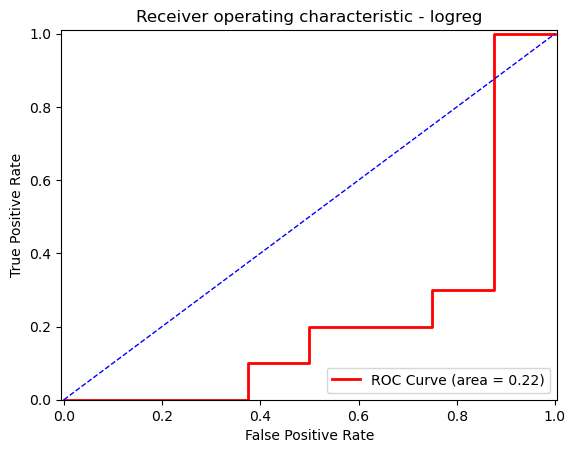

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - logreg')
plt.legend(loc="lower right")

plt.show()

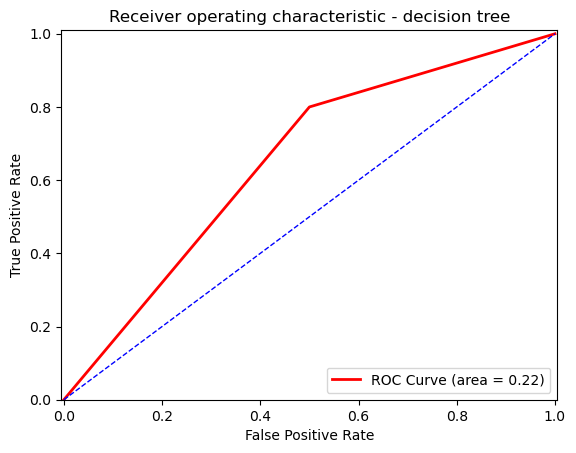

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - decision tree')
plt.legend(loc="lower right")

plt.show()

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 18, bootstrap = True, random_state=2)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict

In [156]:
# Training ONLY on the training set:
my_RandomForest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=18, random_state=2)

In [157]:
# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)
print(y_predict_rf)

['Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'No' 'No']


In [158]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_rf = accuracy_score(y_test, y_predict_rf)

print(score_rf)


0.6666666666666666
